# <span style="color:green">Capstone Project Group 6 : Prediction of Loan Defaulters</span>

## <span style="color:blue">Importing all the required libraries</span> 

#### <span style="color:brown"> We are importing all the modules which will be useful in creation of a Logistic Regression Model.</span>

In [15]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE
plt.rcParams['figure.figsize'] = [15,8]

## <span style="color:blue">Reading the Data Set</span> 

In [16]:
df1 =pd.read_csv('train_indessa.csv')
df1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,,19.190000,E,E3,clerk,9 years,OWN,28700.000000,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.880000,0.000000,1.000000,50.000000,75.000000,14.000000,1.000000,22515.000000,73.100000,28.000000,f,1173.840000,0.000000,0.000000,0.000000,0.000000,74.000000,INDIVIDUAL,NaN,26th week,0.000000,0.000000,28699.000000,30800.000000,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.990000,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.000000,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.640000,0.000000,1.000000,NaN,NaN,6.000000,0.000000,7624.000000,23.200000,13.000000,w,83.950000,0.000000,0.000000,0.000000,0.000000,NaN,INDIVIDUAL,NaN,9th week,0.000000,0.000000,9974.000000,32900.000000,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.260000,A,A4,Driver,2 years,OWN,45000.000000,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.420000,0.000000,0.000000,NaN,NaN,5.000000,0.000000,10877.000000,31.200000,19.000000,w,56.470000,0.000000,0.000000,0.000000,0.000000,NaN,INDIVIDUAL,NaN,9th week,0.000000,65.000000,38295.000000,34900.000000,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.720000,D,D5,Us office of Personnel Management,10+ years,RENT,105000.000000,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.970000,0.000000,2.000000,46.000000,NaN,10.000000,0.000000,13712.000000,55.500000,21.000000,f,4858.620000,0.000000,0.000000,0.000000,0.000000,NaN,INDIVIDUAL,NaN,135th week,0.000000,0.000000,55564.000000,24700.000000,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.640000,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.000000,Verified,n,NaN,credit_card,refi,900xx,CA,20.160000,0.000000,0.000000,NaN,NaN,11.000000,0.000000,35835.000000,76.200000,27.000000,w,2296.410000,0.000000,0.000000,0.000000,0.000000,NaN,INDIVIDUAL,NaN,96th week,0.000000,0.000000,47159.000000,47033.000000,0


In [17]:
df=df1.copy()

## <span style="color:blue">EDA</span> 

In [18]:
null_values=pd.DataFrame(data=df.isna().sum(),columns=['Count'])
null_values['Percentage']=df.isna().sum()/len(df)*100
null_values.sort_values(by='Percentage',ascending=False,inplace=True)
null_values

,Count,Percentage
verification_status_joint,532123,99.942715
desc,456829,85.801085
mths_since_last_record,450305,84.575755
mths_since_last_major_derog,399448,75.023853
mths_since_last_delinq,272554,51.190771
batch_enrolled,85149,15.992585
total_rev_hi_lim,42004,7.889142
tot_cur_bal,42004,7.889142
tot_coll_amt,42004,7.889142
emp_title,30833,5.791018


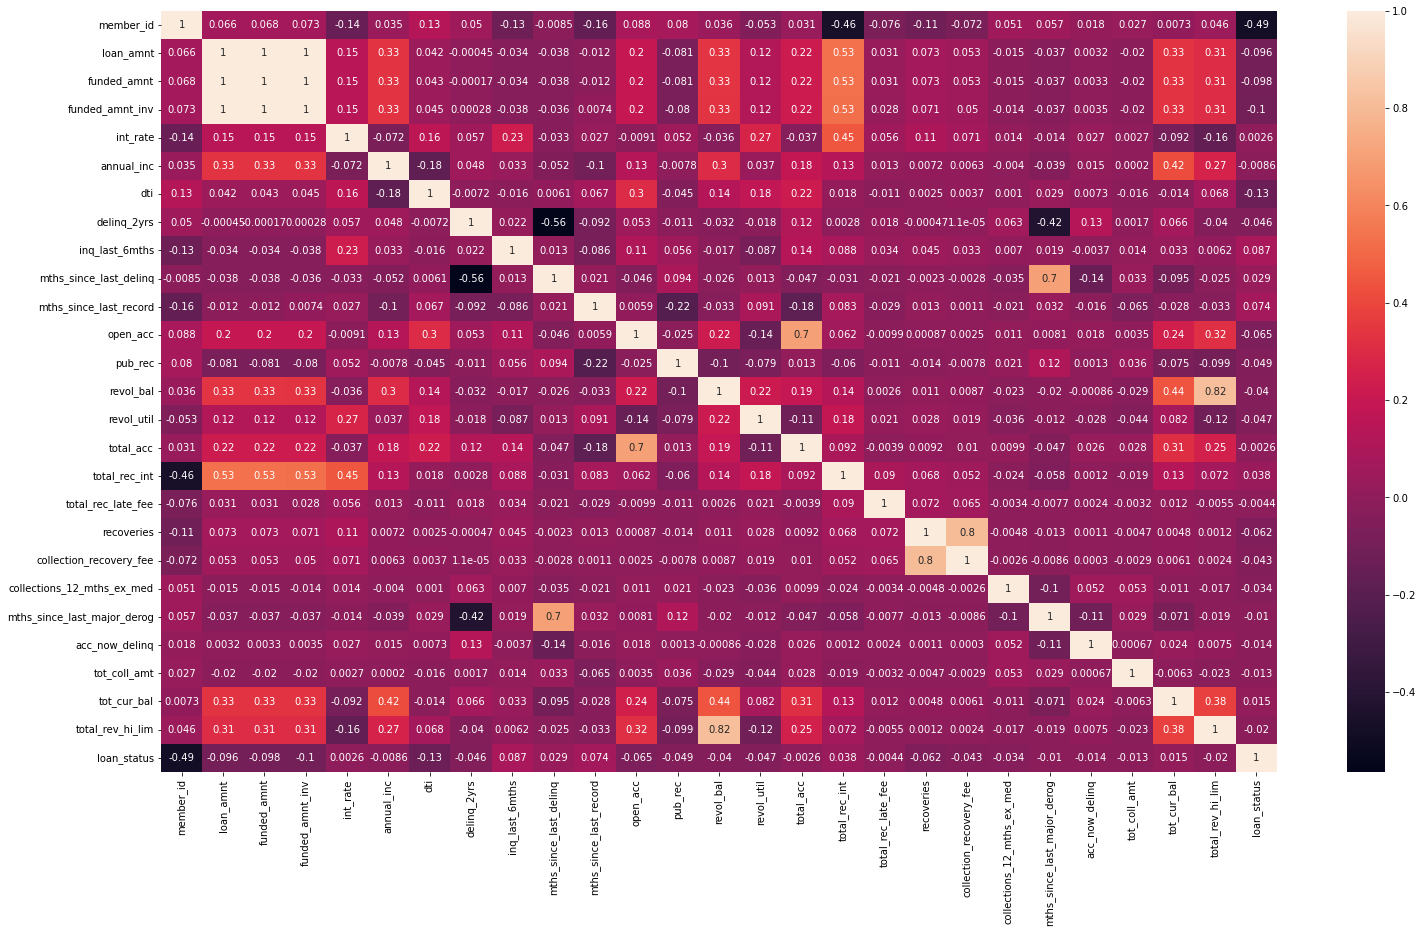

In [19]:
plt.figure(figsize=(25,14))
sns.heatmap(df.corr(),annot=True)
plt.show()

### <span style="color:brown"> Checking the shape of the Data Set.</span>

In [20]:
df.shape

(532428, 45)

#### <span style="color:black">  It consists of 532428 data points and 45 features.</span>

### <span style="color:brown"> Checking the Info of features.</span>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

### <span style="color:brown"> Checking the Description of Numeric features.</span>

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,532428.000000,35005472.347129,24121476.515915,70473.000000,10866882.500000,37095895.000000,58489200.750000,73544841.000000
loan_amnt,532428.000000,14757.595722,8434.420080,500.000000,8000.000000,13000.000000,20000.000000,35000.000000
funded_amnt,532428.000000,14744.271291,8429.139277,500.000000,8000.000000,13000.000000,20000.000000,35000.000000
funded_amnt_inv,532428.000000,14704.926696,8441.290381,0.000000,8000.000000,13000.000000,20000.000000,35000.000000
int_rate,532428.000000,13.242969,4.379611,5.320000,9.990000,12.990000,16.200000,28.990000
annual_inc,532425.000000,75029.843289,65199.845014,1200.000000,45000.000000,65000.000000,90000.000000,9500000.000000
dti,532428.000000,18.138767,8.369074,0.000000,11.930000,17.650000,23.950000,672.520000
delinq_2yrs,532412.000000,0.314448,0.860045,0.000000,0.000000,0.000000,0.000000,30.000000
inq_last_6mths,532412.000000,0.694603,0.997025,0.000000,0.000000,0.000000,1.000000,31.000000
mths_since_last_delinq,259874.000000,34.055735,21.884797,0.000000,15.000000,31.000000,50.000000,180.000000


### <span style="color:brown"> Checking the Description of Categorical features.</span>

In [23]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
term,532428,2,36 months,372793
batch_enrolled,447279,104,,106079
grade,532428,7,B,152713
sub_grade,532428,35,B3,33844
emp_title,501595,190124,Teacher,8280
emp_length,505537,11,10+ years,175105
home_ownership,532428,6,MORTGAGE,265940
verification_status,532428,3,Source Verified,197750
pymnt_plan,532428,2,n,532420
desc,75599,70638,> Debt consolidation<br>,576


### <span style="color:brown"> Checking Whether the Data is balanced.</span>

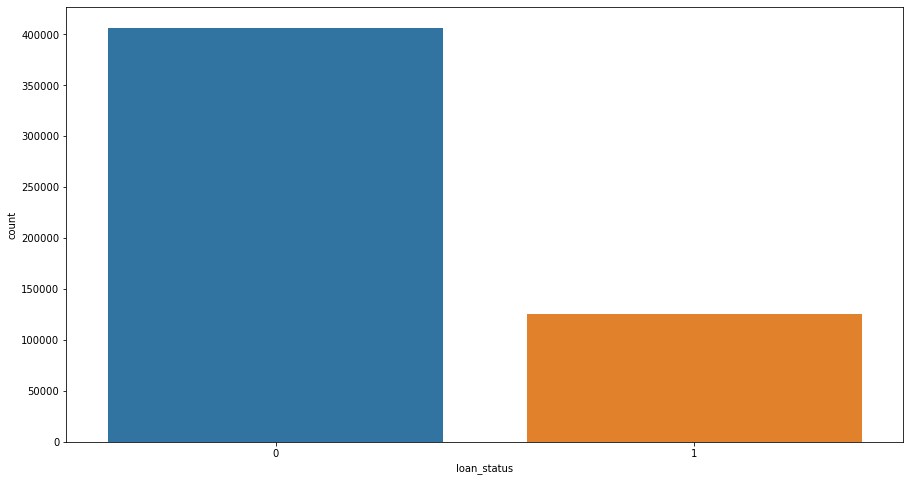

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(df['loan_status'])
plt.show()

In [25]:
df['loan_status'].value_counts(normalize=True)
print('It is a highly imbalanced data with non Defaulters Data being three times that of Defaulters Data.')

It is a highly imbalanced data with non Defaulters Data being three times that of Defaulters Data.


### <span style="color:brown"> Checking for Duplicated Data.</span>

In [26]:
df.duplicated().sum()
print('There are 0 Duplicated Data Points')

There are 0 Duplicated Data Points


### <span style="color:brown"> Dropping the Redundant Columns.</span> 

In [27]:
df.drop('member_id',axis=1,inplace= True)

In [28]:
df[['loan_amnt','funded_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.999276,0.997124
funded_amnt,0.999276,1.000000,0.998041
funded_amnt_inv,0.997124,0.998041,1.000000


In [29]:
# statement
df.drop(['loan_amnt','funded_amnt_inv'],axis=1,inplace= True)

In [30]:
df.drop('batch_enrolled',axis=1,inplace= True)

In [31]:
df['emp_title'].nunique()

190124

In [32]:
df.drop('emp_title',axis=1,inplace= True)

In [33]:
df.drop(['title', 'zip_code', 'addr_state','desc'],axis=1,inplace= True)

In [34]:
# statement
df.drop(['delinq_2yrs', 'inq_last_6mths'],axis=1,inplace= True)

In [35]:
# ----------------------------- STD

In [36]:
df.std()

funded_amnt                     8429.139277
int_rate                           4.379611
annual_inc                     65199.845014
dti                                8.369074
mths_since_last_delinq            21.884797
mths_since_last_record            28.139219
open_acc                           5.311442
pub_rec                            0.583822
revol_bal                      22423.215835
revol_util                        23.853436
total_acc                         11.843211
total_rec_int                   2093.199837
total_rec_late_fee                 4.091546
recoveries                       409.647467
collection_recovery_fee           63.123361
collections_12_mths_ex_med         0.133005
mths_since_last_major_derog       22.198410
acc_now_delinq                     0.079117
tot_coll_amt                    1958.571538
tot_cur_bal                   153914.877437
total_rev_hi_lim               38053.035312
loan_status                        0.424826
dtype: float64

In [37]:
# statement
df.drop('acc_now_delinq',axis=1,inplace= True)

In [38]:
# --------------------------------------- countplot

In [39]:
def countplot(column_name):
    plt.figure(figsize=(15,8))
    sns.countplot(x=df[column_name], hue=df['loan_status'])
    plt.title('COUNT-PLOT OF {} v/s LOAN STATUS'.format(column_name))
    plt.show()

In [40]:
# ------------------------------------------

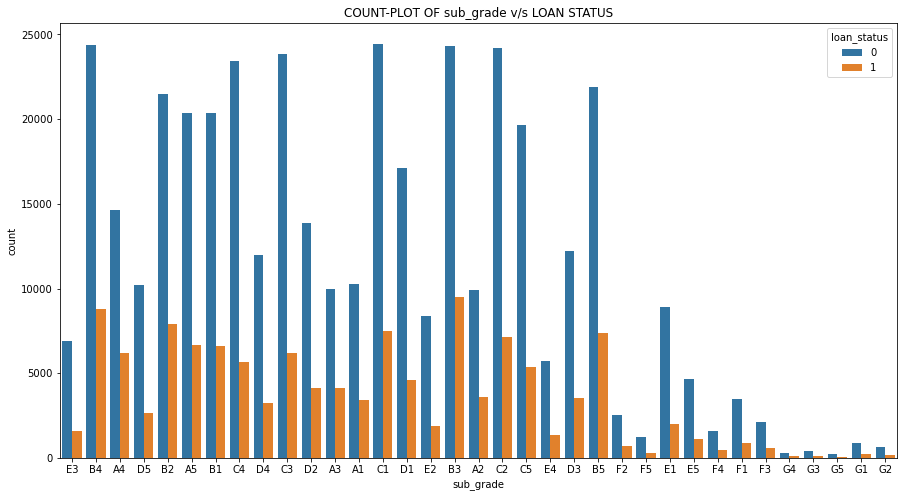

In [41]:
countplot('sub_grade')

In [42]:
# statement
df.drop('sub_grade',axis=1,inplace= True)

In [43]:
# ----------------------------------------------

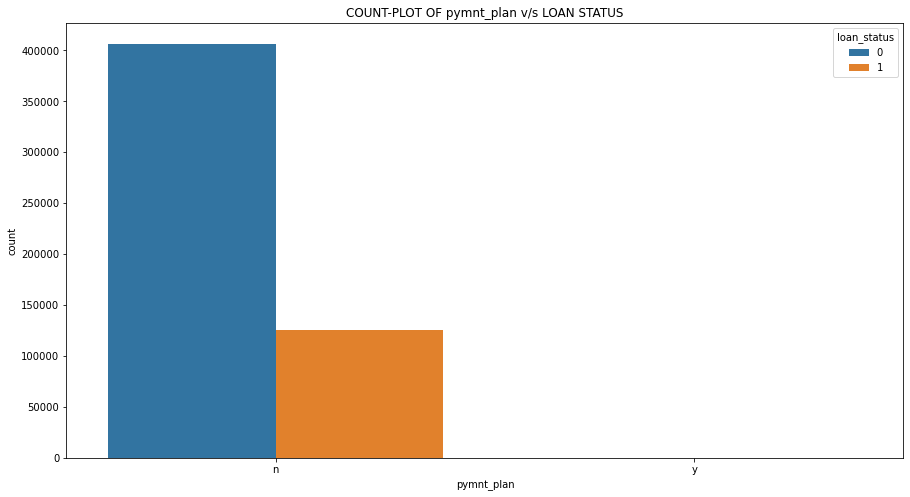

In [44]:
countplot('pymnt_plan')

In [45]:
# pymnt_plan contains all the observations as only one category which will not be any significant in our analysis. 
# So, proceeding to drop this particular column
df = df[df.pymnt_plan == 'n']
df.drop('pymnt_plan',axis=1,inplace= True)

In [46]:
# ----------------------------------------------------

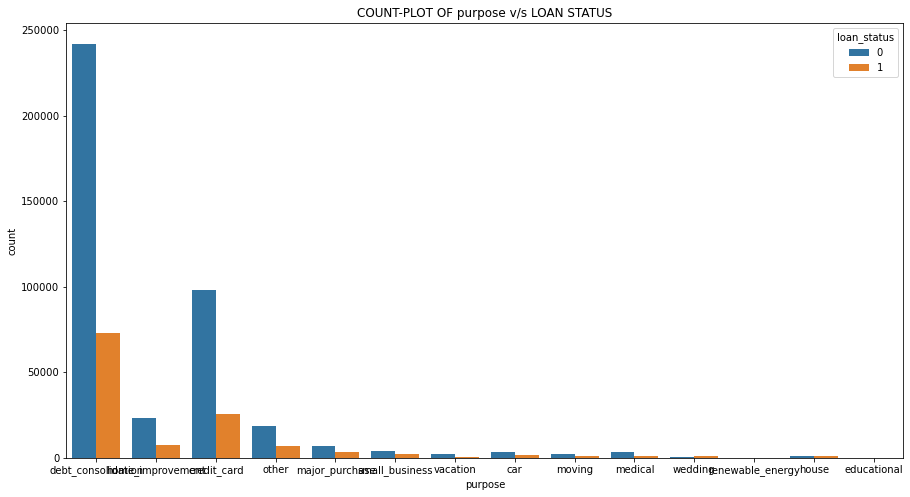

In [47]:
countplot('purpose')

In [48]:
# Majority of he loans were taken for debt consolidation, home improvement and credit card
# Other purposes cnstitute very small portion. So, Other types of purposes can be clubbed together

In [49]:
df['purpose'].replace(['other','major_purchase', 'small_business', 'vacation', 'car', 'moving',
                       'medical', 'wedding', 'renewable_energy', 'house', 'educational'], 'other', inplace=True)

In [50]:
df['purpose'].unique()

array(['debt_consolidation', 'home_improvement', 'credit_card', 'other'],
      dtype=object)

In [51]:
# --------------------------------

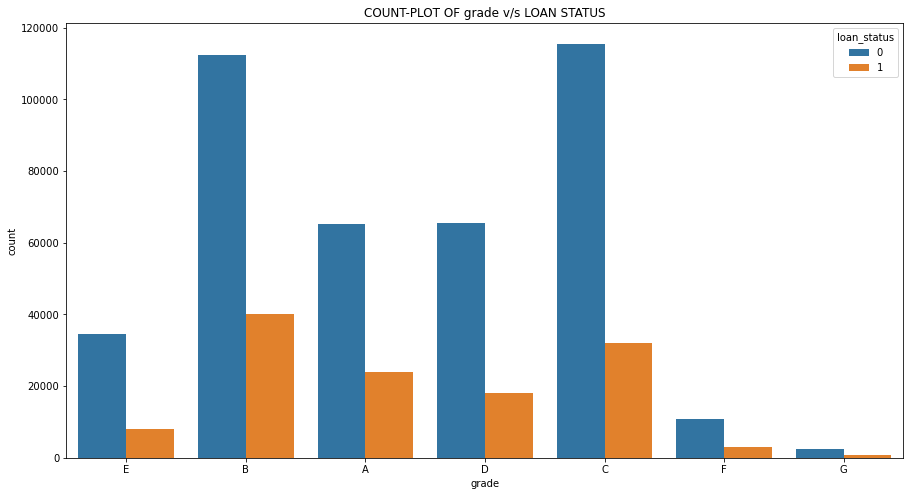

In [52]:
countplot('grade')

In [53]:
# clubbing grades E,F,G into others since they have very less count

df['grade'].replace(['E','F','G'], 'others', inplace=True)

In [54]:
# -------------------------------------------

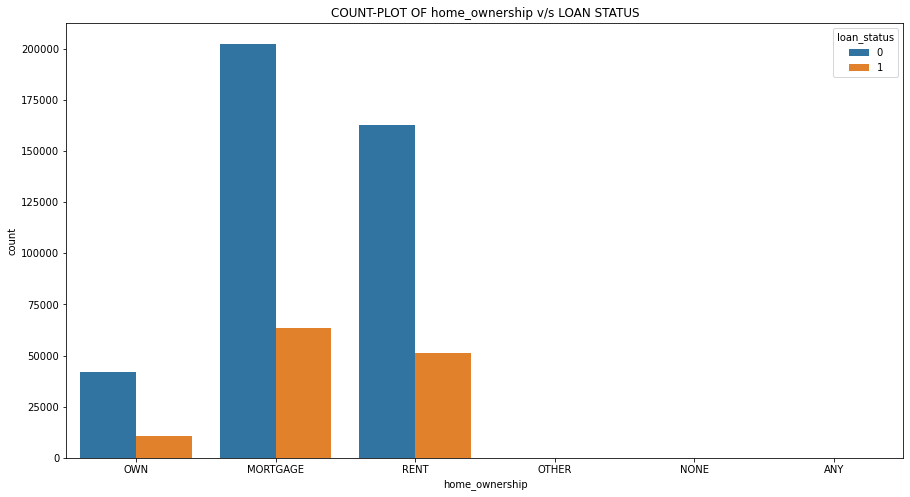

In [55]:
countplot('home_ownership')

In [56]:
# clubbing OTHERS,NONE,ANY into OTHERS since they have very less count

df['home_ownership'].replace(['OTHER','NONE','ANY'],'OTHERS',inplace=True)

In [57]:
# ----------------------------------------------------

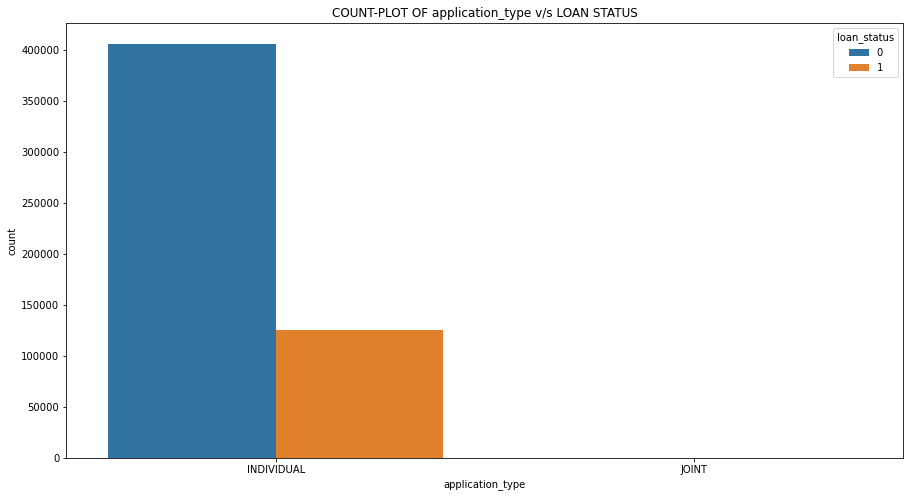

In [58]:
countplot('application_type')

In [59]:
# application_type contains all the observations as only one category which will not be any significant in our analysis. 
# So, proceeding to drop this particular column
df.drop('application_type',axis  =1, inplace = True)

In [60]:
# ---------------------------------------------- After dropping redundant features !!

In [61]:
df.shape

(532420, 30)

In [62]:
df.columns

Index(['funded_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'verification_status_joint',
       'last_week_pay', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [63]:
# ----------------------------------------
# CHECKING FOR NULL VALUES 
# ----------------------------------------

In [64]:
null_values=pd.DataFrame(data=df.isna().sum(),columns=['Count'])
null_values['Percentage']=df.isna().sum()/len(df)*100
null_values.sort_values(by='Percentage',ascending=False,inplace=True)
null_values

,Count,Percentage
verification_status_joint,532115,99.942714
mths_since_last_record,450298,84.575711
mths_since_last_major_derog,399441,75.023666
mths_since_last_delinq,272550,51.190789
total_rev_hi_lim,42001,7.888697
tot_cur_bal,42001,7.888697
tot_coll_amt,42001,7.888697
emp_length,26891,5.050712
revol_util,287,0.053905
collections_12_mths_ex_med,95,0.017843


In [65]:
for i in null_values[null_values['Count'] != 0].index:
    print('SUMMARY OF ',i)
    print('PERCENTAGE OF NULL VALUES IS: ', null_values.loc[i]['Percentage'])
    print()
    print(df[i].describe())
    print()

SUMMARY OF  verification_status_joint
PERCENTAGE OF NULL VALUES IS:  99.94271439840728

count              305
unique               3
top       Not Verified
freq               170
Name: verification_status_joint, dtype: object

SUMMARY OF  mths_since_last_record
PERCENTAGE OF NULL VALUES IS:  84.57571090492468

count   82122.000000
mean       70.093495
std        28.139124
min         0.000000
25%        51.000000
50%        70.000000
75%        92.000000
max       121.000000
Name: mths_since_last_record, dtype: float64

SUMMARY OF  mths_since_last_major_derog
PERCENTAGE OF NULL VALUES IS:  75.02366552721536

count   132979.000000
mean        44.121388
std         22.198477
min          0.000000
25%         27.000000
50%         44.000000
75%         61.000000
max        180.000000
Name: mths_since_last_major_derog, dtype: float64

SUMMARY OF  mths_since_last_delinq
PERCENTAGE OF NULL VALUES IS:  51.19078922655047

count   259870.000000
mean        34.055882
std         21.884597
min  

In [66]:
# statement > 51% 
df.drop(['verification_status_joint','mths_since_last_record','mths_since_last_major_derog'], axis=1,inplace=True)

In [67]:
# ------------------ total_rev_hi_lim { PERCENTAGE OF NULL VALUES IS:  7.888 }

In [68]:
df['total_rev_hi_lim'].skew()

77.38317433974389

In [69]:
 df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(),inplace=True)

In [70]:
# ------------------ tot_cur_bal { PERCENTAGE OF NULL VALUES IS:  7.88 }

In [71]:
df['tot_cur_bal'].skew()

3.011769456780976

In [72]:
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(),inplace=True)

In [73]:
# -------------------------- tot_coll_amt [ PERCENTAGE OF NULL VALUES IS:  7.88 ]

In [74]:
df['tot_coll_amt'].skew()

61.64189907293498

In [75]:
df['tot_coll_amt'].value_counts(normalize=True)[0] * 100
# 85% are zeroes !!

85.82436651108542

In [76]:
df['tot_coll_amt'].fillna(0,inplace=True) # fill with median !

In [77]:
# --------------------------- mths_since_last_delinq  { PERCENTAGE OF NULL VALUES IS:  51.19 }

In [78]:
df['mths_since_last_delinq'].describe()

count   259870.000000
mean        34.055882
std         21.884597
min          0.000000
25%         15.000000
50%         31.000000
75%         50.000000
max        180.000000
Name: mths_since_last_delinq, dtype: float64

In [79]:
# statemnt 
a=df.groupby('grade')['mths_since_last_delinq'].mean()
dic={i:round(a[i]) for i in a.index}
dic

{'A': 36, 'B': 34, 'C': 34, 'D': 34, 'others': 33}

In [80]:
df['mths_since_last_delinq'].fillna(df['grade'].map(dic), inplace=True)

In [81]:
# ---------------------------------------------- emp_length { PERCENTAGE OF NULL VALUES IS:  5.05 }

In [82]:
df.emp_length.unique()

array(['9 years', '< 1 year', '2 years', '10+ years', '5 years',
       '8 years', '7 years', '4 years', nan, '1 year', '3 years',
       '6 years'], dtype=object)

In [83]:
df['emp_length'].replace(to_replace=['< 1 year','1 year','2 years','3 years','4 years','5 years',  
                                          '6 years','7 years','8 years','9 years','10+ years'],
                                         value = [0,1,2,3,4,5,6,7,8,9,10],inplace=True)

In [84]:
df.emp_length.describe()

count   505529.000000
mean         6.010585
std          3.665449
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64

In [85]:
df.groupby('grade')['emp_length'].mean()

grade
A        5.994163
B        6.008215
C        6.003396
D        6.012488
others   6.056344
Name: emp_length, dtype: float64

In [86]:
df['emp_length'].skew()

-0.24358065549477104

In [87]:
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [88]:
df['emp_length'] = df['emp_length'].astype(int)

In [89]:
df['emp_length'] = ['Low' if i <= 3 else 'High' if i >= 8 else 'Medium' for i in df['emp_length']]

In [90]:
df.emp_length.unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [91]:
# -------------------------- 

In [92]:
df.dropna(inplace=True)

In [93]:
df.reset_index(inplace=True, drop = True)

In [94]:
df.isnull().sum().sum()

0

<AxesSubplot:>

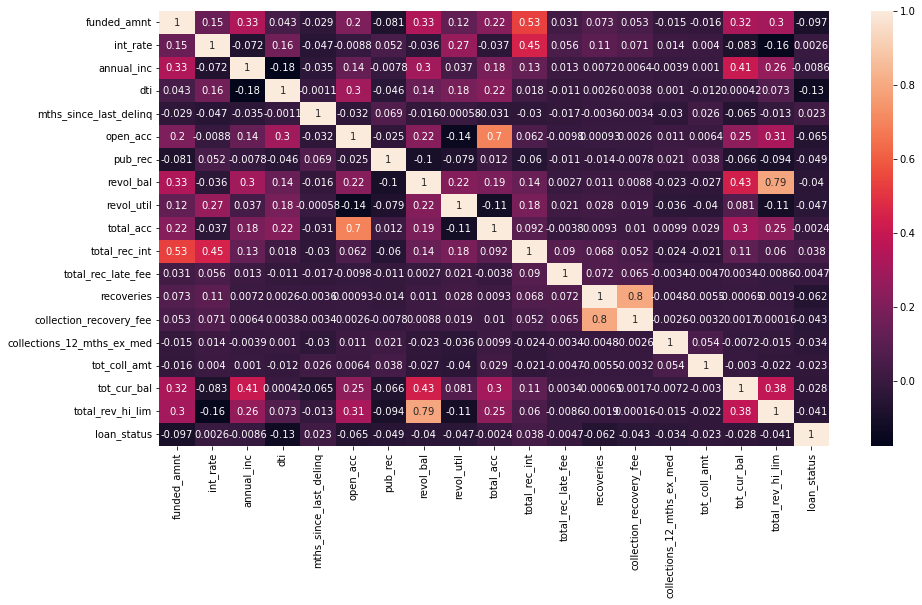

In [95]:
sns.heatmap(df.corr(), annot=True)

In [99]:
# ----------------------------------------------------- AFTER HANDLING NULL VALUES !!!

In [100]:
df.shape

(532057, 27)

In [101]:
df.head()

,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,36 months,19.190000,others,High,OWN,28700.000000,Source Verified,debt_consolidation,33.880000,50.000000,14.000000,1.000000,22515.000000,73.100000,28.000000,f,1173.840000,0.000000,0.000000,0.000000,0.000000,26th week,0.000000,28699.000000,30800.000000,0
1,4800,36 months,10.990000,B,Low,MORTGAGE,65000.000000,Source Verified,home_improvement,3.640000,34.000000,6.000000,0.000000,7624.000000,23.200000,13.000000,w,83.950000,0.000000,0.000000,0.000000,0.000000,9th week,0.000000,9974.000000,32900.000000,0
2,10000,36 months,7.260000,A,Low,OWN,45000.000000,Not Verified,debt_consolidation,18.420000,36.000000,5.000000,0.000000,10877.000000,31.200000,19.000000,w,56.470000,0.000000,0.000000,0.000000,0.000000,9th week,65.000000,38295.000000,34900.000000,0
3,15000,36 months,19.720000,D,High,RENT,105000.000000,Not Verified,debt_consolidation,14.970000,46.000000,10.000000,0.000000,13712.000000,55.500000,21.000000,f,4858.620000,0.000000,0.000000,0.000000,0.000000,135th week,0.000000,55564.000000,24700.000000,0
4,16000,36 months,10.640000,B,High,RENT,52000.000000,Verified,credit_card,20.160000,34.000000,11.000000,0.000000,35835.000000,76.200000,27.000000,w,2296.410000,0.000000,0.000000,0.000000,0.000000,96th week,0.000000,47159.000000,47033.000000,0


In [102]:
df.to_csv('data_clean.csv',sep=",", index=False)

#### <span style="color:brown"> Seperating the Numerical and Categorical features.</span>

In [103]:
cat = df.select_dtypes(exclude=[np.number])
num = df.select_dtypes(include=[np.number])

In [104]:
cat.columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'last_week_pay'],
      dtype='object')

In [105]:
num = num.columns[num.columns != 'loan_status']

In [106]:
#  --------------------------------

In [107]:
for i in cat.columns:
    print('COLUMN NAME: ',i)
    print('NUMBER OF SUB CLASSES: ', df[i].nunique())
    print()
    print(df[i].value_counts())
    print()
    print(df[i].describe())
    print()

COLUMN NAME:  term
NUMBER OF SUB CLASSES:  2

36 months    372490
60 months    159567
Name: term, dtype: int64

count        532057
unique            2
top       36 months
freq         372490
Name: term, dtype: object

COLUMN NAME:  grade
NUMBER OF SUB CLASSES:  5

B         152651
C         147401
A          89074
D          83473
others     59458
Name: grade, dtype: int64

count     532057
unique         5
top            B
freq      152651
Name: grade, dtype: object

COLUMN NAME:  emp_length
NUMBER OF SUB CLASSES:  3

High      222113
Low       165742
Medium    144202
Name: emp_length, dtype: int64

count     532057
unique         3
top         High
freq      222113
Name: emp_length, dtype: object

COLUMN NAME:  home_ownership
NUMBER OF SUB CLASSES:  4

MORTGAGE    265767
RENT        213514
OWN          52625
OTHERS         151
Name: home_ownership, dtype: int64

count       532057
unique           4
top       MORTGAGE
freq        265767
Name: home_ownership, dtype: object

COLUMN NA

In [108]:
# ---------------- UNIVARIATE ANALYSIS FOR CATEGORICAL FEATURES

In [109]:
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

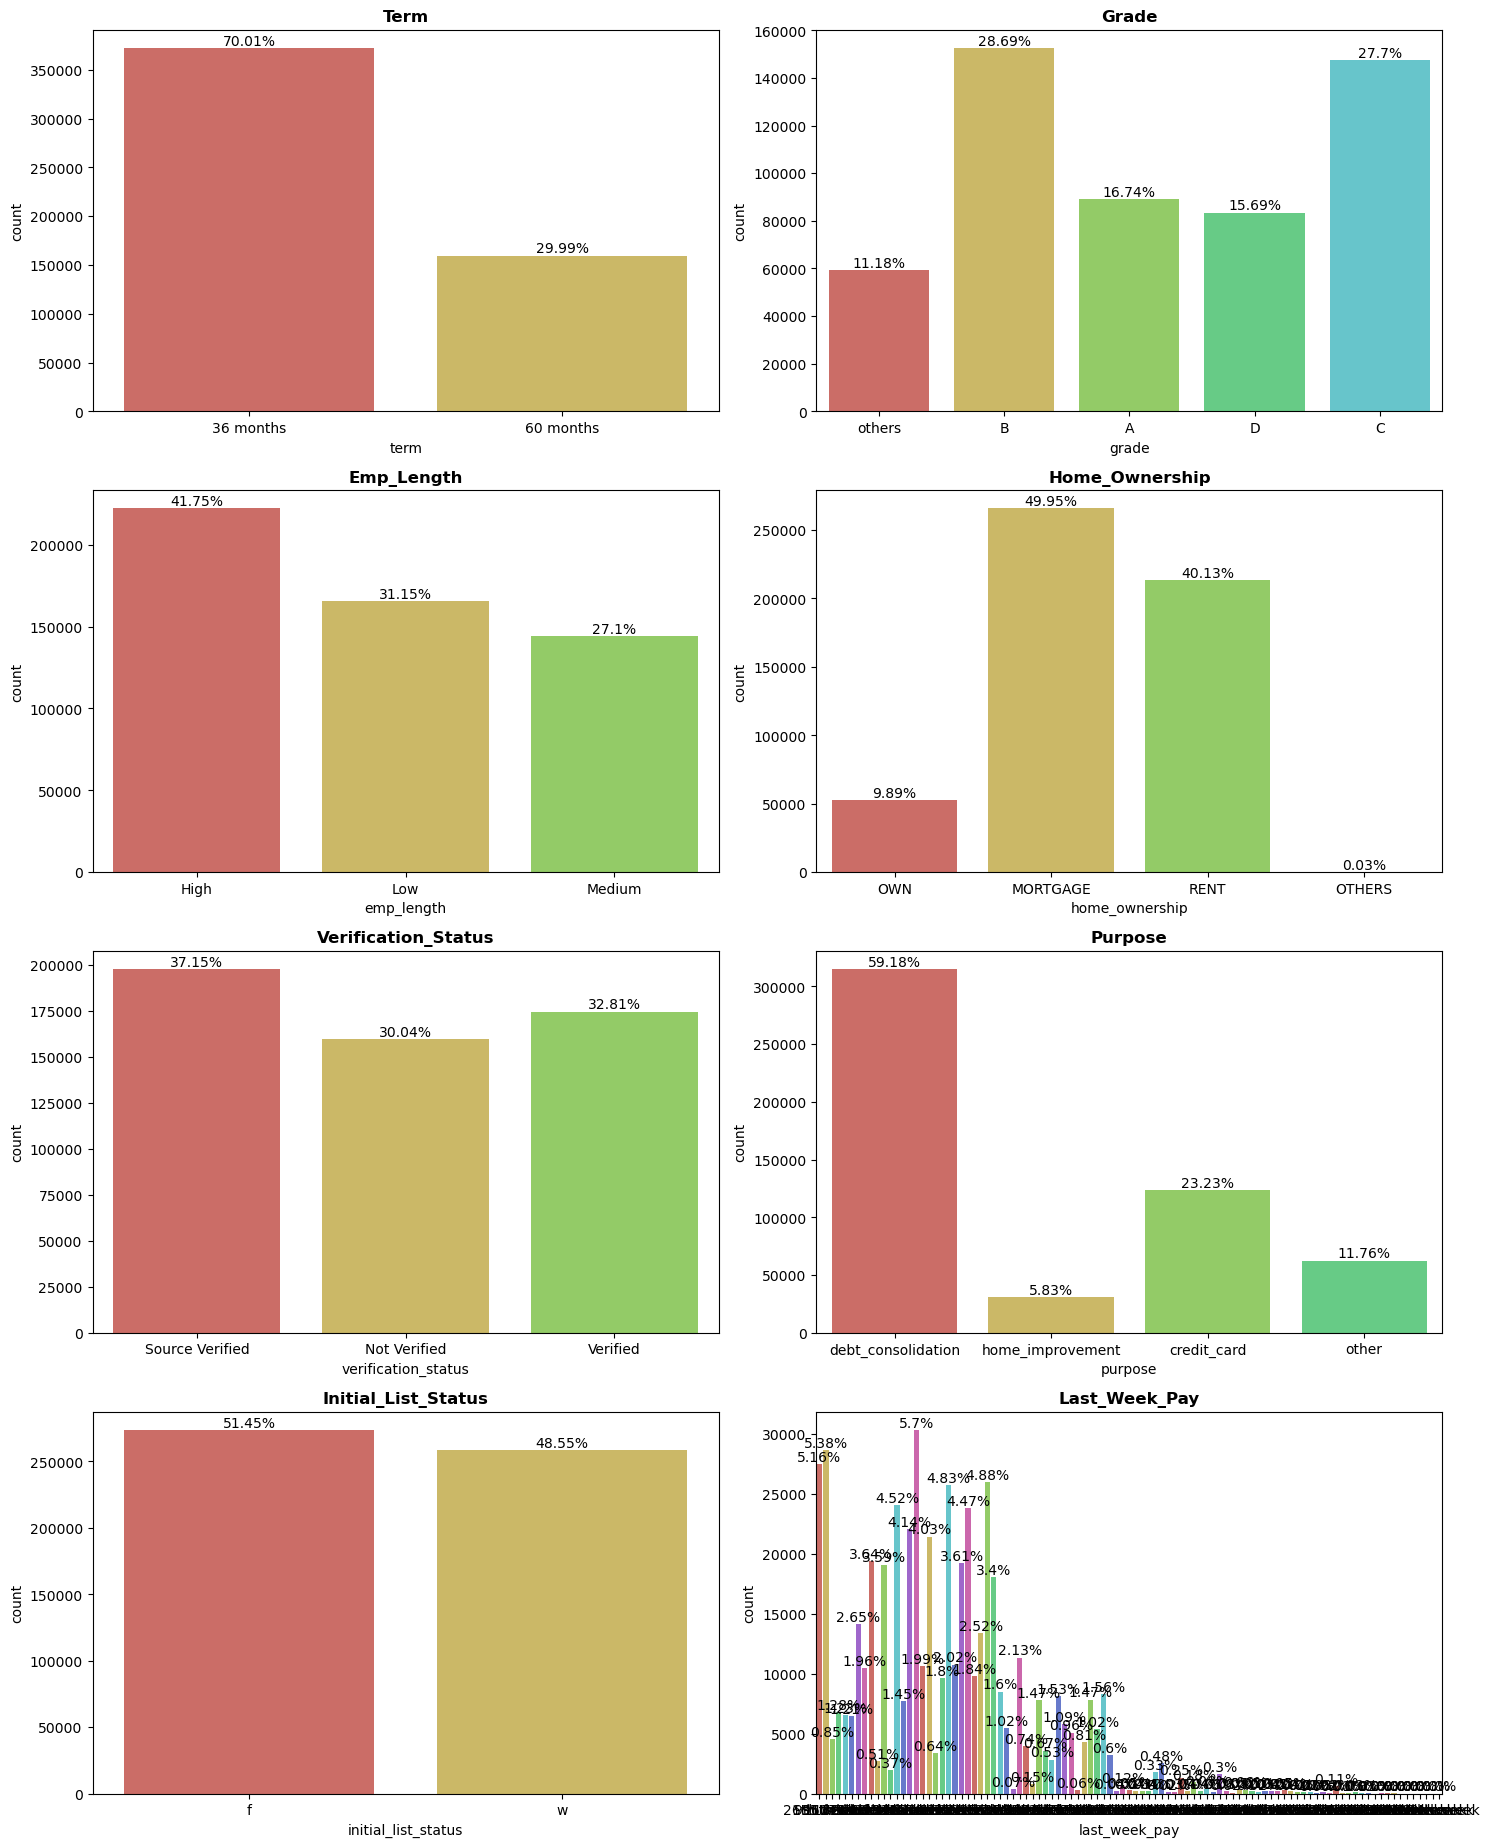

In [110]:
plt.figure(figsize=(15,55),dpi=100)
n=1
for i in cat:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.countplot(df[i] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

In [111]:
# ---------------- UNIVARIATE ANALYSIS FOR NUMERICAL FEATURES

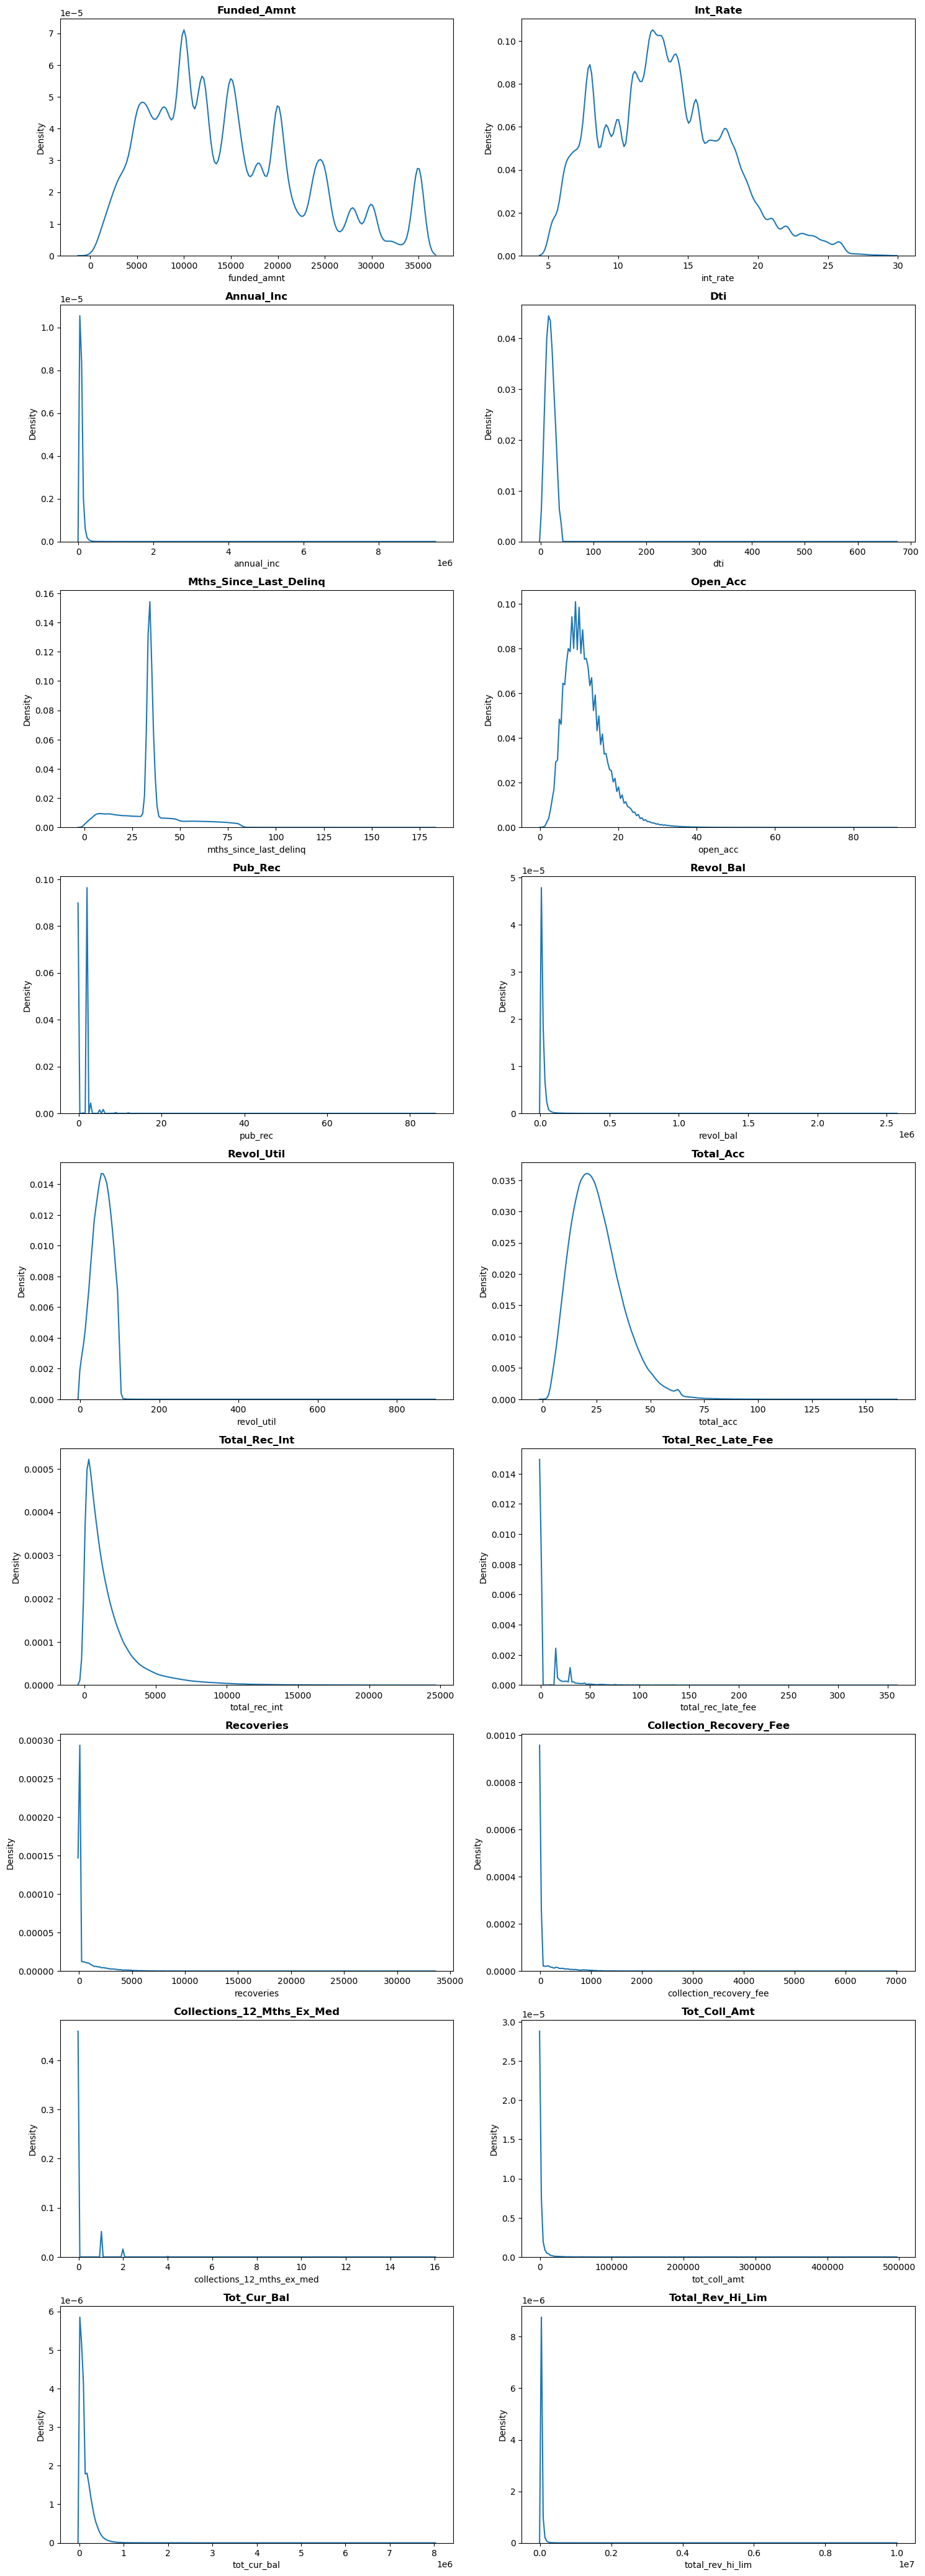

In [112]:
plt.figure(figsize=(15,55),dpi=100)
n=1
for i in num:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.kdeplot(df[i] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

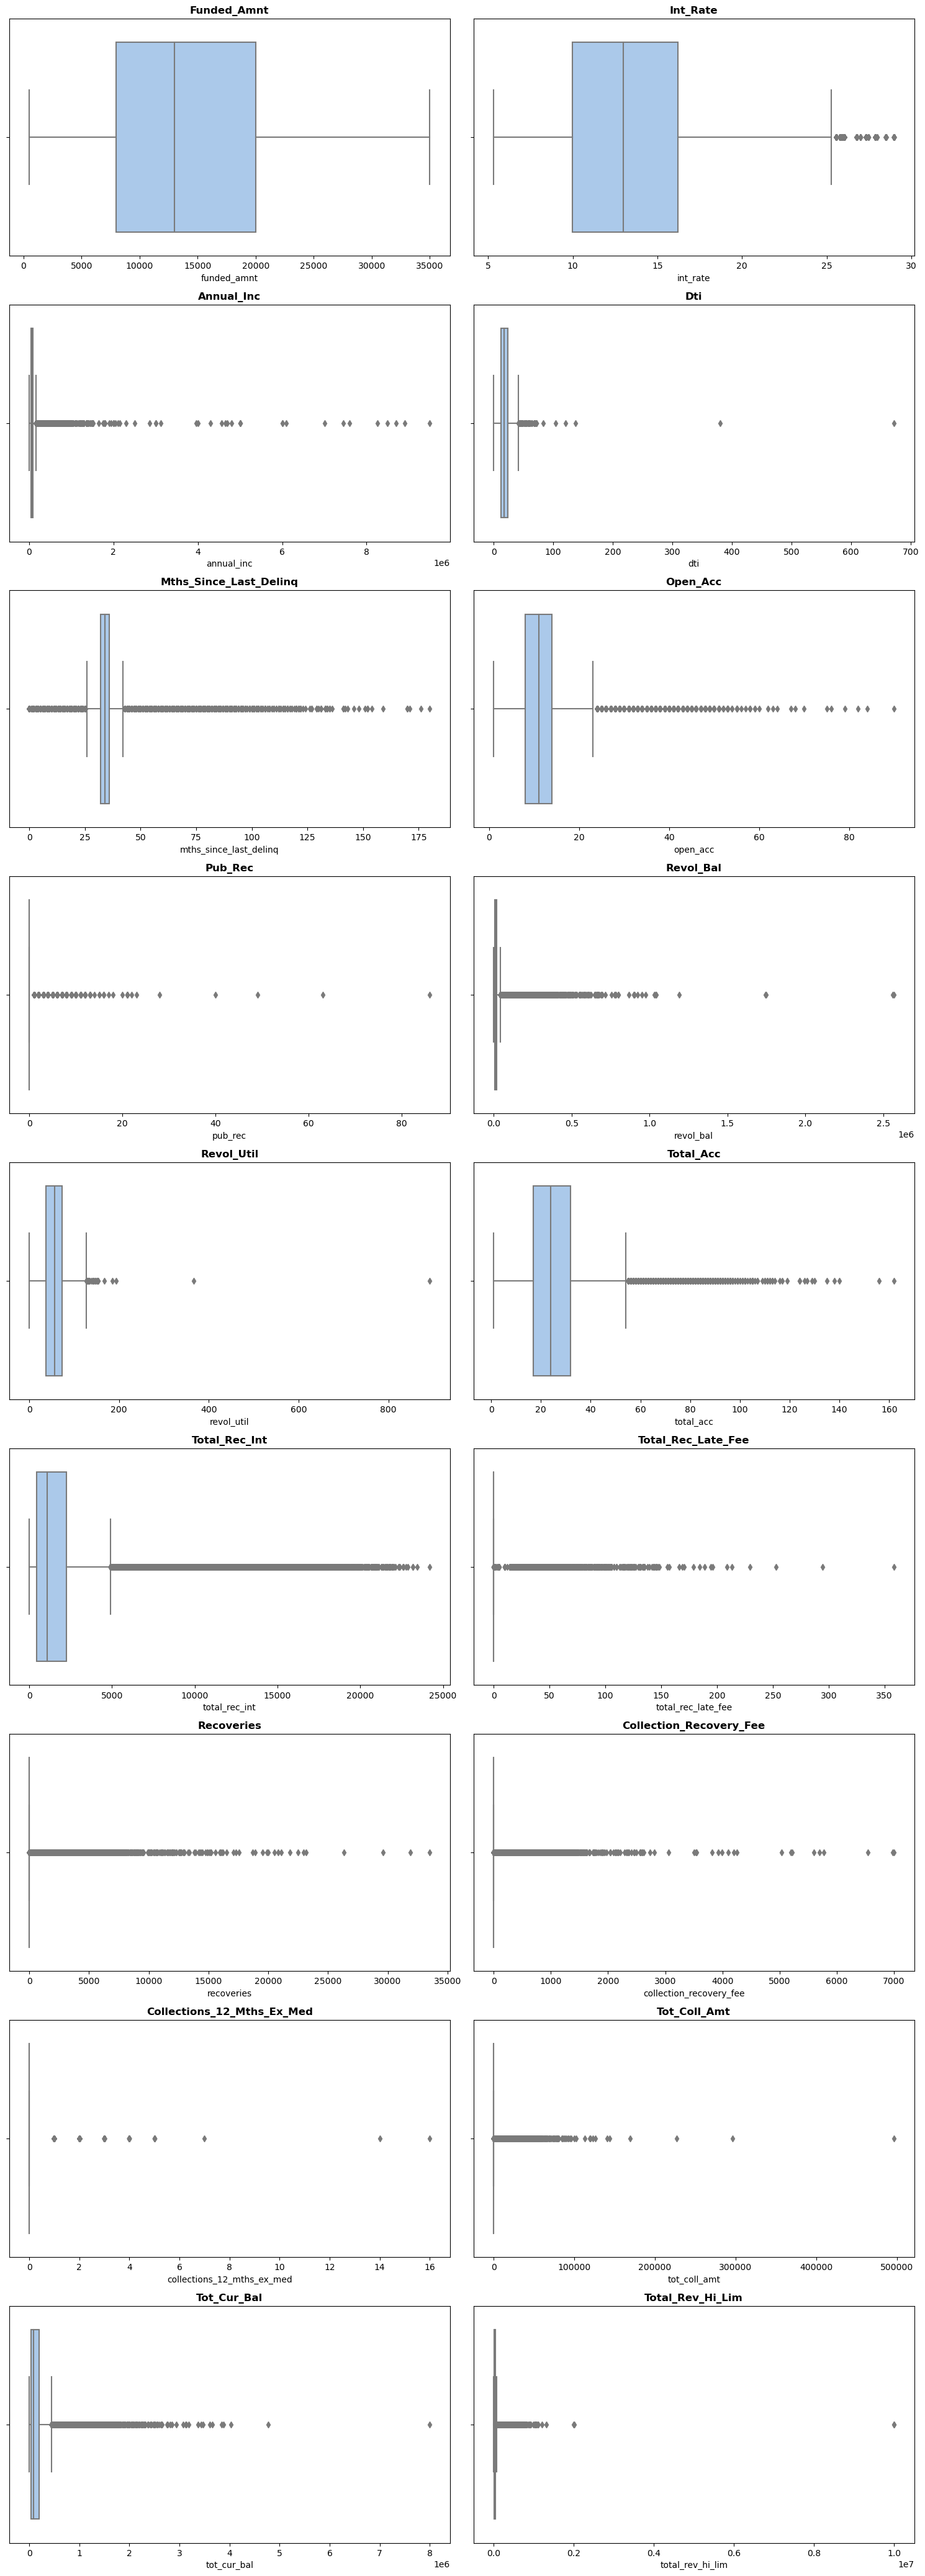

In [113]:
plt.figure(figsize=(15,55),dpi=100)
n=1
for i in num:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.boxplot(df[i] ,palette=sns.color_palette("pastel", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

In [114]:
# ---------------- BIVARIATE ANALYSIS FOR CATEGORICAL FEATURES

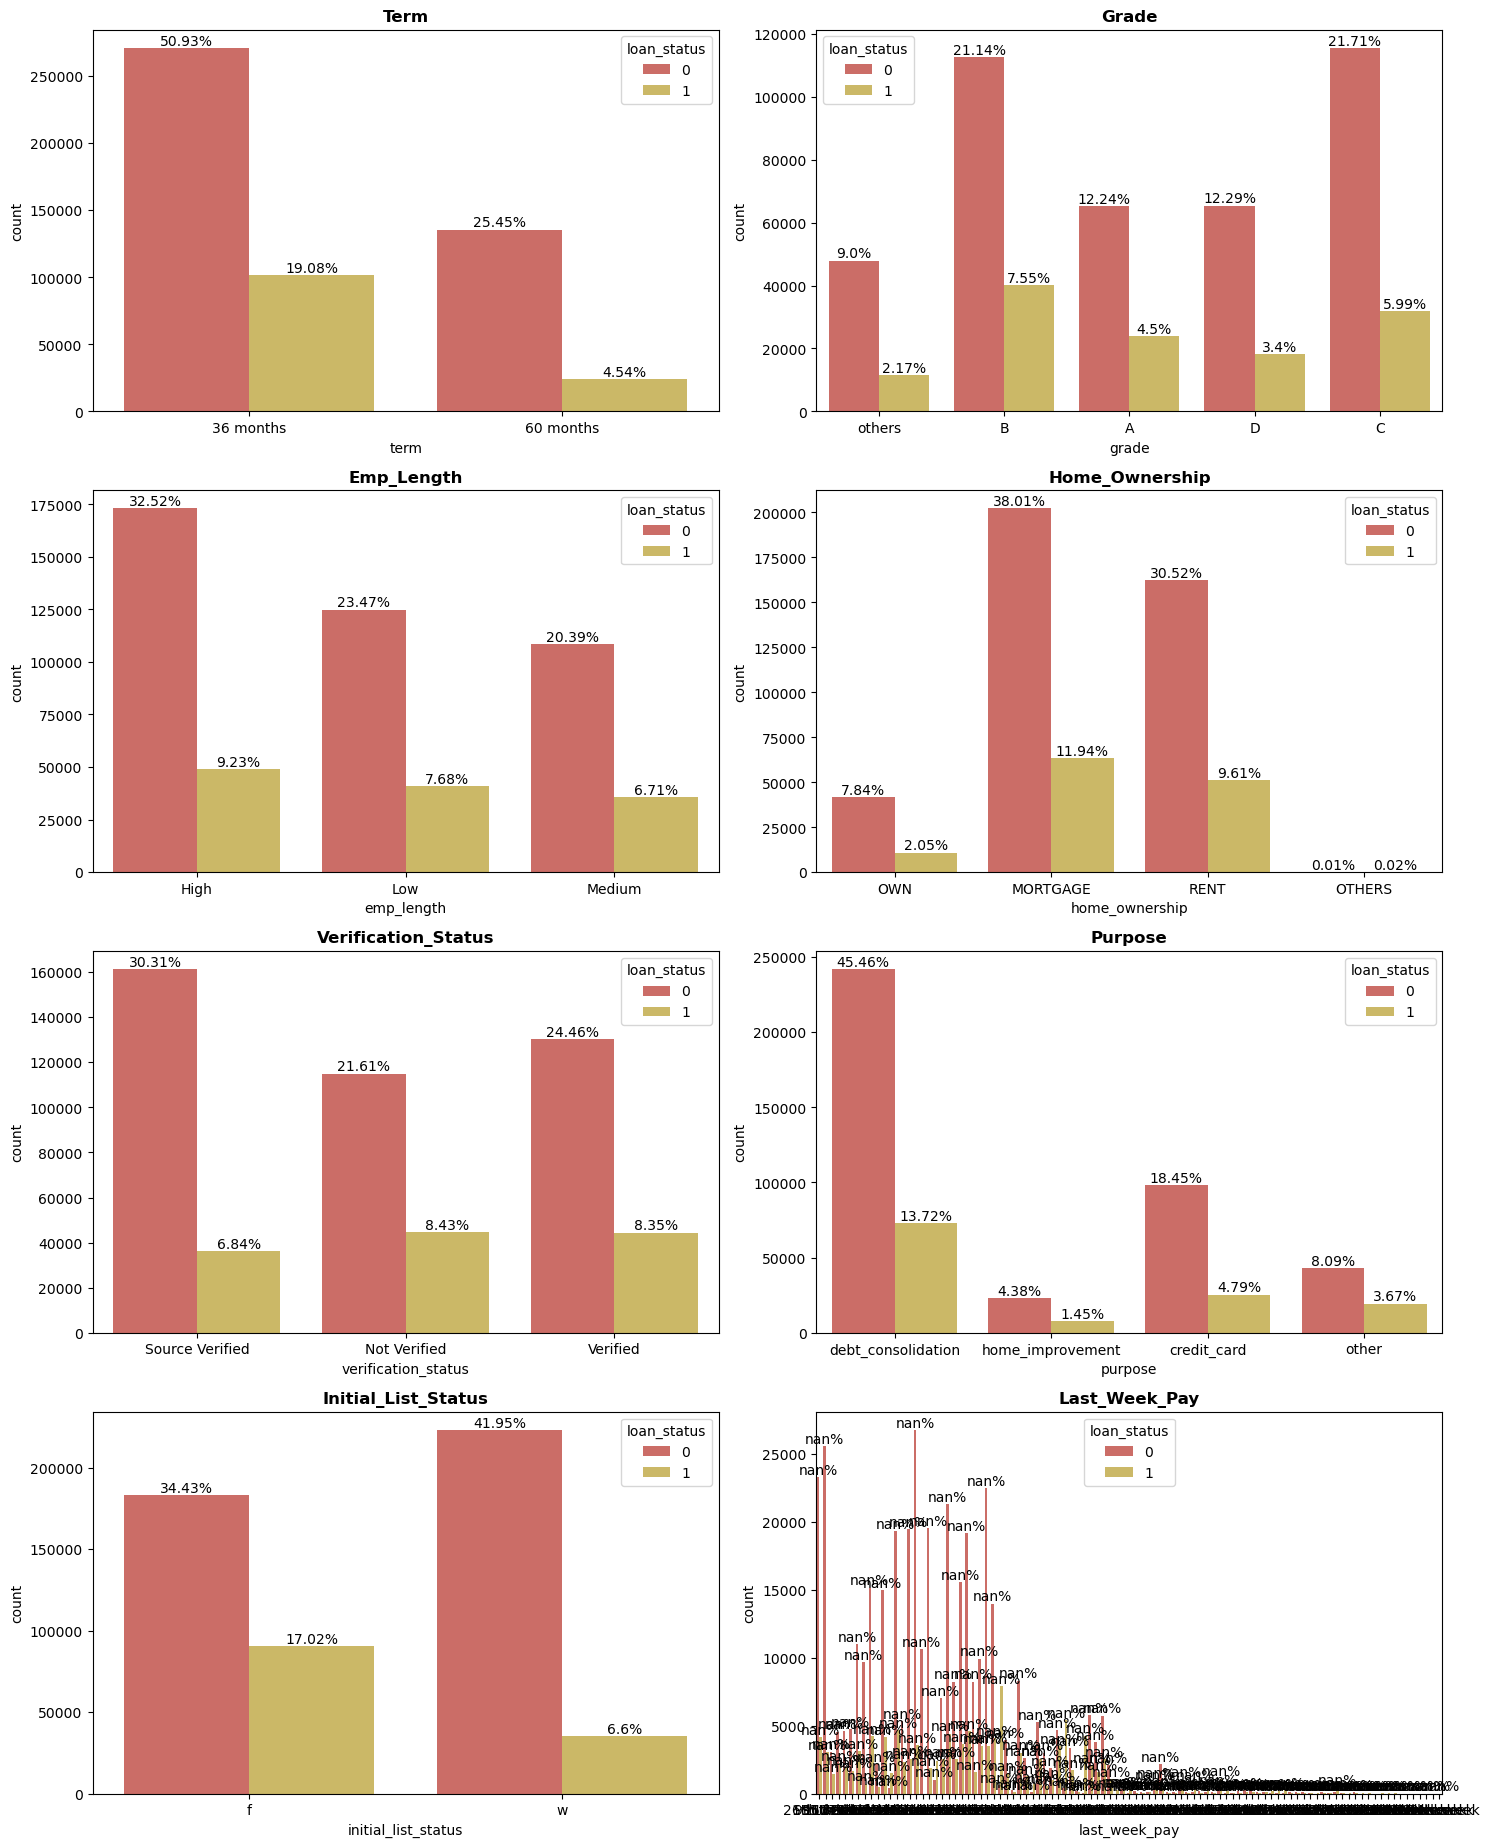

In [115]:
plt.figure(figsize=(15,55),dpi=100)
n=1
for i in cat:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.countplot(df[i] ,hue=df['loan_status'], palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

In [116]:
# ---------------- BIVARIATE ANALYSIS FOR NUMERICAL FEATURES

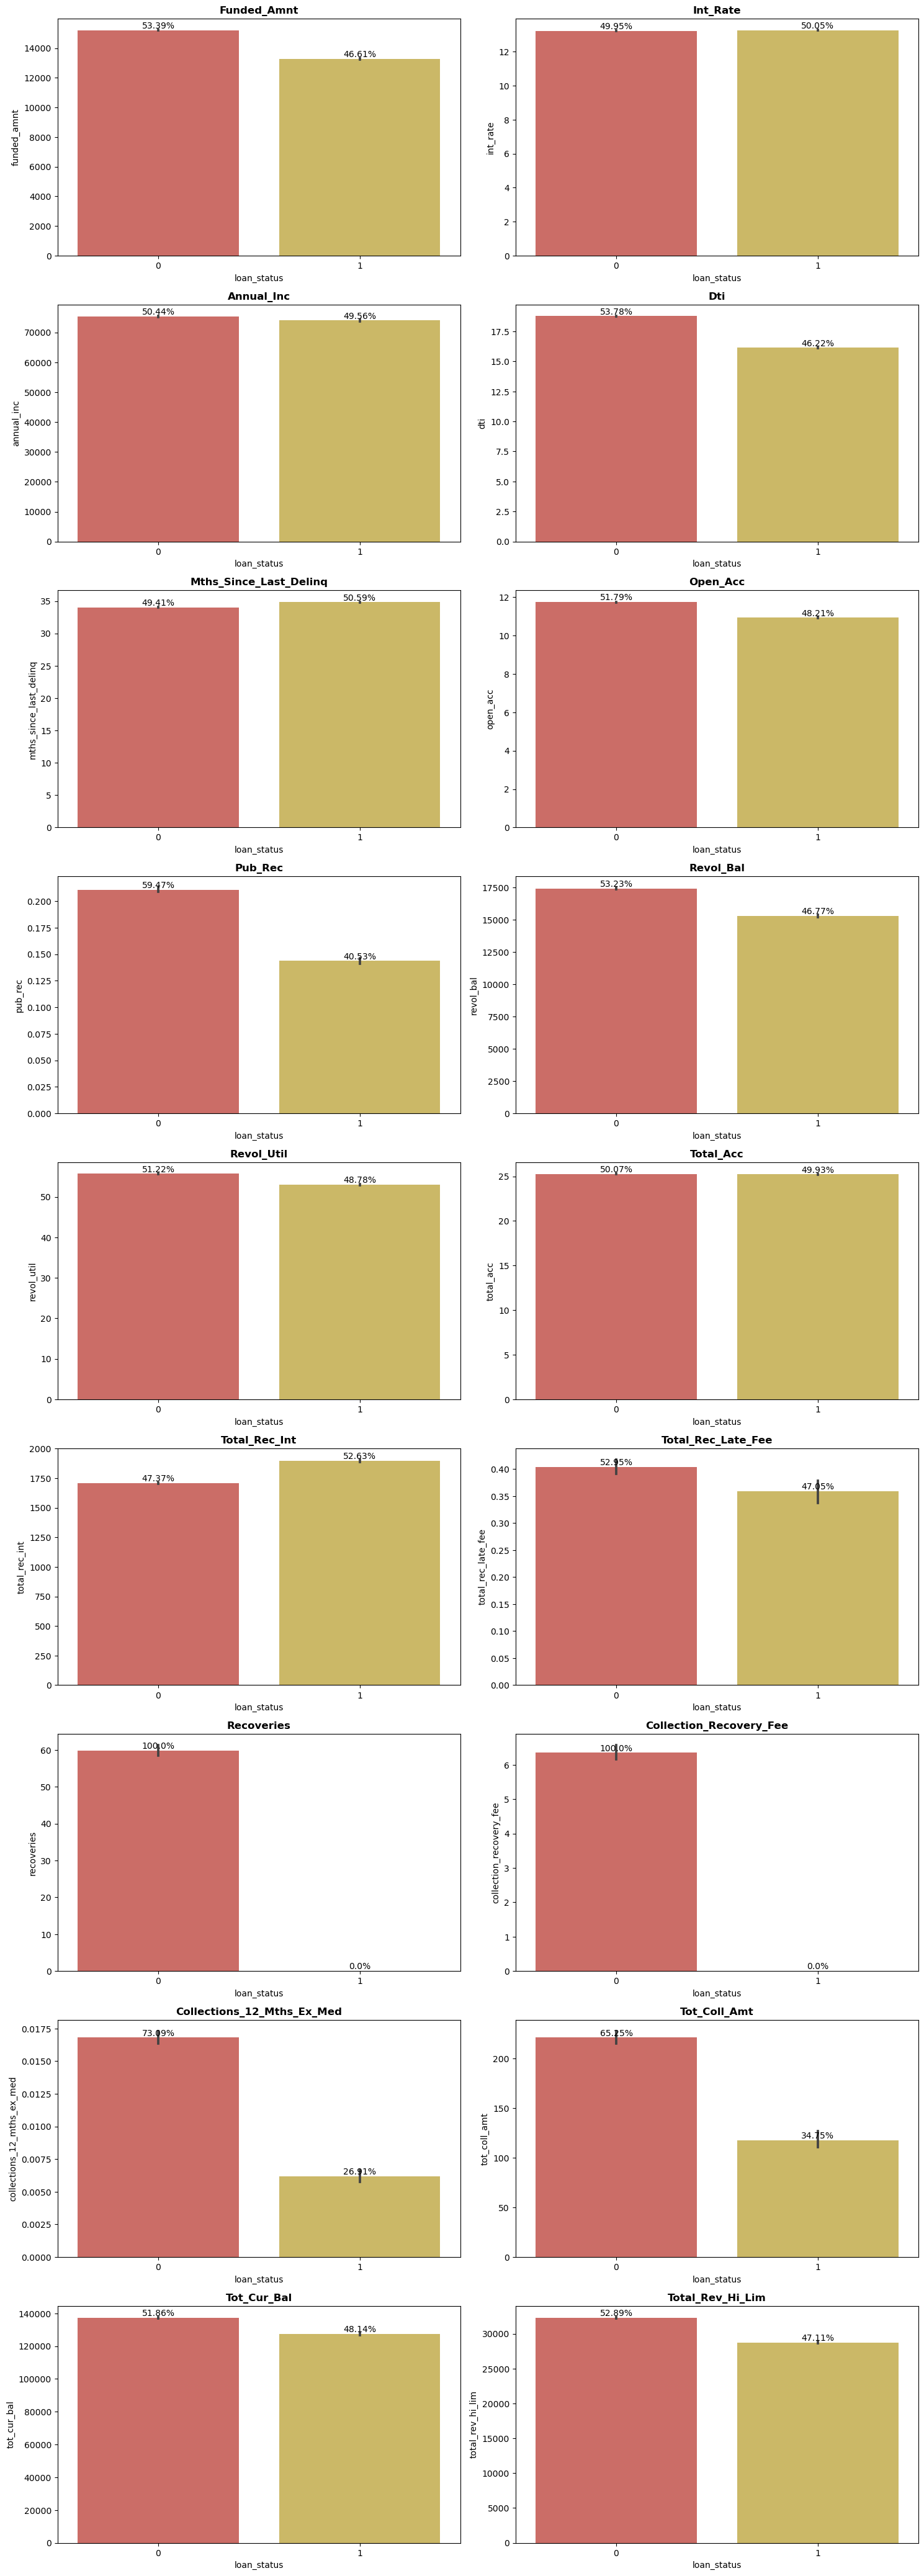

In [117]:
plt.figure(figsize=(15,55),dpi=100)
n=1
for i in num:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.barplot(y = df[i] , x =df['loan_status'], palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

In [118]:
# ------------------------- convert the neccessary data types

In [119]:
df['open_acc'] = df['open_acc'].astype(int)
df['pub_rec'] = df['pub_rec'].astype(int)
df['total_acc'] = df['total_acc'].astype(int)

In [120]:
# -------------------- last_week_pay

In [121]:
df['last_week_pay'] = df['last_week_pay'].str.extract('(\d+)', expand=False)
df.fillna('10000',inplace=True)
df['last_week_pay'] = df['last_week_pay'].replace('10000','13')
df['last_week_pay'] = df['last_week_pay'].astype(int)

In [122]:
# ------------------------ verification_status

In [123]:
df['verification_status'].replace('Source Verified','Verified',inplace=True)

In [124]:
# --------------------------- 

In [125]:
df.to_csv('data1.csv',sep=",", index=False)

In [126]:
# ----------------------------- FEATURE ENGINEERING

In [127]:
# NEW FEATURE 1
df['rec_and_col_fee']=df['collection_recovery_fee']+df['recoveries']
df.drop(columns=['collection_recovery_fee','recoveries'],axis=1,inplace=True)

In [128]:
df['rec_and_col_fee'].describe()

count   532057.000000
mean        50.547333
std        461.628012
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      37594.613600
Name: rec_and_col_fee, dtype: float64

In [129]:
# NEW FEATURE 2
df['emi_paid_progress_perc'] = ((df['last_week_pay']/(df['term'].str.replace('months','').astype(int)/12*52+1))*100)

In [130]:
# ------------------ drop last_week_pay
df.drop('last_week_pay', axis=1, inplace=True)

In [131]:
df.to_csv('data2.csv',sep=",", index=False)

In [132]:
# ------------------------------------------- ENCODING OF CATEGORICAL FEATURES  

In [133]:
cat_f = df.select_dtypes(exclude=[np.number])

In [134]:
num_f = df.select_dtypes(include=[np.number])

In [135]:
num_f.drop('loan_status',axis=1,inplace=True)

In [136]:
df_target = df['loan_status']

In [137]:
for i in cat_f:
    print('COLUMN NAME: ',i)
    print('NUMBER OF SUB CLASSES: ', df[i].nunique())
    print('-'*30)
    print(df[i].value_counts())
    print()
    print(df[i].describe())
    print('#'*30)

COLUMN NAME:  term
NUMBER OF SUB CLASSES:  2
------------------------------
36 months    372490
60 months    159567
Name: term, dtype: int64

count        532057
unique            2
top       36 months
freq         372490
Name: term, dtype: object
##############################
COLUMN NAME:  grade
NUMBER OF SUB CLASSES:  5
------------------------------
B         152651
C         147401
A          89074
D          83473
others     59458
Name: grade, dtype: int64

count     532057
unique         5
top            B
freq      152651
Name: grade, dtype: object
##############################
COLUMN NAME:  emp_length
NUMBER OF SUB CLASSES:  3
------------------------------
High      222113
Low       165742
Medium    144202
Name: emp_length, dtype: int64

count     532057
unique         3
top         High
freq      222113
Name: emp_length, dtype: object
##############################
COLUMN NAME:  home_ownership
NUMBER OF SUB CLASSES:  4
------------------------------
MORTGAGE    265767
RENT 

In [138]:
cat_f.shape

(532057, 7)

In [139]:
# ----- ONE HOT ENCODING

In [140]:
df_cat = pd.get_dummies(cat_f, drop_first=True)
df_cat.shape

(532057, 15)

In [141]:
# ----------- CHECKING FOR TRANSFORMATION OF NUMERICAL TRANSFORMATION

In [142]:
num_f.head()

,funded_amnt,int_rate,annual_inc,dti,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,rec_and_col_fee,emi_paid_progress_perc
0,14350,19.190000,28700.000000,33.880000,50.000000,14,1,22515.000000,73.100000,28,1173.840000,0.000000,0.000000,0.000000,28699.000000,30800.000000,0.000000,16.560510
1,4800,10.990000,65000.000000,3.640000,34.000000,6,0,7624.000000,23.200000,13,83.950000,0.000000,0.000000,0.000000,9974.000000,32900.000000,0.000000,5.732484
2,10000,7.260000,45000.000000,18.420000,36.000000,5,0,10877.000000,31.200000,19,56.470000,0.000000,0.000000,65.000000,38295.000000,34900.000000,0.000000,5.732484
3,15000,19.720000,105000.000000,14.970000,46.000000,10,0,13712.000000,55.500000,21,4858.620000,0.000000,0.000000,0.000000,55564.000000,24700.000000,0.000000,85.987261
4,16000,10.640000,52000.000000,20.160000,34.000000,11,0,35835.000000,76.200000,27,2296.410000,0.000000,0.000000,0.000000,47159.000000,47033.000000,0.000000,61.146497


In [143]:
num_f.skew()

funded_amnt                   0.683197
int_rate                      0.428628
annual_inc                   44.835335
dti                           1.290799
mths_since_last_delinq        0.626031
open_acc                      1.252816
pub_rec                      15.316560
revol_bal                    16.005419
revol_util                   -0.089604
total_acc                     0.893383
total_rec_int                 2.833214
total_rec_late_fee           17.716336
collections_12_mths_ex_med   15.756420
tot_coll_amt                 64.156486
tot_cur_bal                   3.173601
total_rev_hi_lim             80.281007
rec_and_col_fee              18.348092
emi_paid_progress_perc        1.027841
dtype: float64

## <span style="color:blue">Checking for Assumtions</span>

### <span style="color:brown"> Multicolinearity Based on VIF</span>

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [166]:
def VIF(dataframe):
    x=dataframe.select_dtypes(include=[np.number])
    vif=pd.DataFrame(columns=['Feature','VIF'])
    for i in range(len(x.columns)):
        vif.loc[i]=[x.columns[i],variance_inflation_factor(x.values,i)]
        vif.sort_values(by='VIF',ascending=False,inplace=True)
    return vif

In [167]:
VIF(df)

,Feature,VIF
5,open_acc,12.272925
9,total_acc,11.295260
1,int_rate,11.237203
8,revol_util,8.644506
0,funded_amnt,7.600825
3,dti,7.212553
15,total_rev_hi_lim,5.989397
7,revol_bal,5.577459
4,mths_since_last_delinq,5.224795
10,total_rec_int,3.589924


## <span style="color:blue"> Statistical Test</span>

In [169]:
from scipy.stats import chi2_contingency
from statsmodels.stats.anova import anova_lm

In [186]:
Dependent_features=pd.DataFrame(columns=['Feature','Target','P_Value','Dependency'])
for i in df_cat.columns:
    table=pd.crosstab(df_cat[i],df_target)
    observed_table=table.values
    test_stat,p_value,dof,expected_value=chi2_contingency(observed=table,correction=False)
    if p_value<0.05:
        Dependent_features=Dependent_features.append({'Feature':i,'Target':'Loan_Status','P_Value':round(p_value,3),
                                                      'Dependency':'Dependent'},ignore_index=True)
    else:
        Dependent_features=Dependent_features.append({'Feature':i,'Target':'Loan_Status','P_Value':round(p_value,3),
                                                      'Dependency':'Independent'},ignore_index=True)
print('Target variable is dependent on the following Features: ')
Dependent_features

Target variable is dependent on the following Features: 


,Feature,Target,P_Value,Dependency
0,term_60 months,Loan_Status,0.000000,Dependent
1,grade_B,Loan_Status,0.000000,Dependent
2,grade_C,Loan_Status,0.000000,Dependent
3,grade_D,Loan_Status,0.000000,Dependent
4,grade_others,Loan_Status,0.000000,Dependent
5,emp_length_Low,Loan_Status,0.000000,Dependent
6,emp_length_Medium,Loan_Status,0.000000,Dependent
7,home_ownership_OTHERS,Loan_Status,0.000000,Dependent
8,home_ownership_OWN,Loan_Status,0.000000,Dependent
9,home_ownership_RENT,Loan_Status,0.000000,Dependent
